<a href="https://colab.research.google.com/github/mmovahed/Spectral_Methods/blob/main/IE/Galerkin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Galerkin weighted residual method

Consider the Fredholm integral equation:

$u(x)=e^{x} - x + \int_{0}^{1} xtu(t)$


Coefficients: [1.00005264 0.99844837 0.51057918 0.13966286 0.06948113]


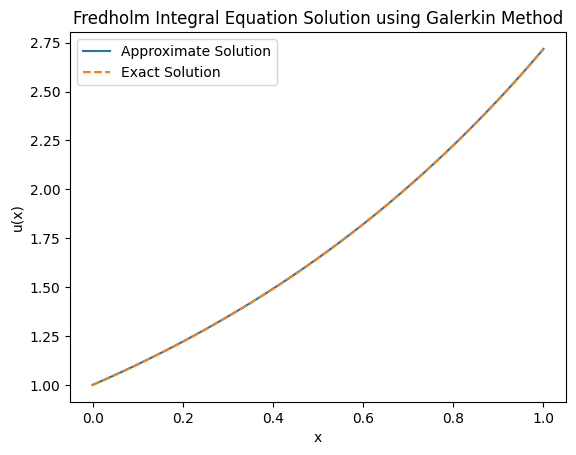

In [2]:
import numpy as np
import scipy.integrate as spi
import scipy.linalg as spl

# Number of basis functions
N = 5

# Define the basis functions
def basis_function(i, x):
    return x ** i

# Inner product calculation
def inner_product(f, g):
    return spi.quad(lambda x: f(x) * g(x), 0, 1)[0]

# Assemble the matrix A and vector b
A = np.zeros((N, N))
b = np.zeros(N)

for i in range(N):
    b[i] = inner_product(lambda x: basis_function(i, x), lambda x: np.exp(x) - x)
    for j in range(N):
        A[i, j] = inner_product(lambda x: basis_function(i, x),
                                lambda x: basis_function(j, x) - x * spi.quad(lambda t: t * basis_function(j, t), 0, 1)[0])

# Solve the linear system A * c = b for coefficients c
c = spl.solve(A, b)

# Define the approximate solution
def u_approx(x):
    return sum(c[i] * basis_function(i, x) for i in range(N))

# Display the coefficients
print("Coefficients:", c)

# Example usage: evaluate u_approx at some points
x_values = np.linspace(0, 1, 100)
u_values = [u_approx(x) for x in x_values]
exact_values = np.exp(x_values)

# Plot the approximate solution
import matplotlib.pyplot as plt

plt.plot(x_values, u_values, label='Approximate Solution')
plt.plot(x_values, exact_values, label='Exact Solution', linestyle='dashed')
plt.legend()
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Fredholm Integral Equation Solution using Galerkin Method')
plt.show()